In [2]:
from utils.data_preparation import get_emotion_dataset, naive_bayes_preprocessing
import pandas as pd
import numpy as np
import string

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

/Users/jantiegges/.pyenv/versions/3.11.5/envs/a3-comp551/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset = get_emotion_dataset()
train_dataset = dataset['train']
df_train = pd.DataFrame(train_dataset)

### Data Fields

- text: a string feature
- label: a classification label, with possible values as listed below: 
    - sadness (0), 
    - joy (1), 
    - love (2), 
    - anger (3), 
    - fear (4), 
    - surprise (5)

In [4]:
# print the first 5 rows of the dataset
df_train.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [6]:
# different labels
df_train['label'].unique()

array([0, 3, 2, 5, 4, 1])

In [7]:
# average sentence length
df_train['text'].str.split().str.len().mean()

19.1663125

## Distribution of labels in the trining set

In [8]:
# creating a labels dict for the emotions
labels_dict = {0:'sadness', 1:'joy', 2:'love', 3:'anger', 4:'fear', 5:'surprise'}
df_train['description'] = df_train['label'].map(labels_dict )
df_train.head()

,text,label,description
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [9]:
df_train['description'].value_counts(normalize=True)

description
joy         0.335125
sadness     0.291625
anger       0.134937
fear        0.121063
love        0.081500
surprise    0.035750
Name: proportion, dtype: float64

<Axes: xlabel='description', ylabel='count'>

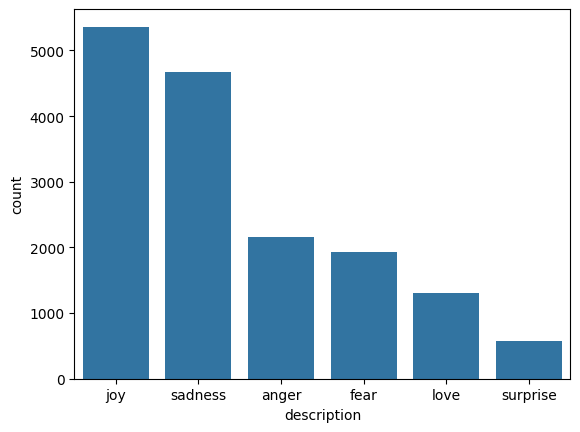

In [10]:
sns.countplot(x='description', 
              order=df_train['description'].value_counts(normalize=True).index,
              data=df_train)


## Text length analysis

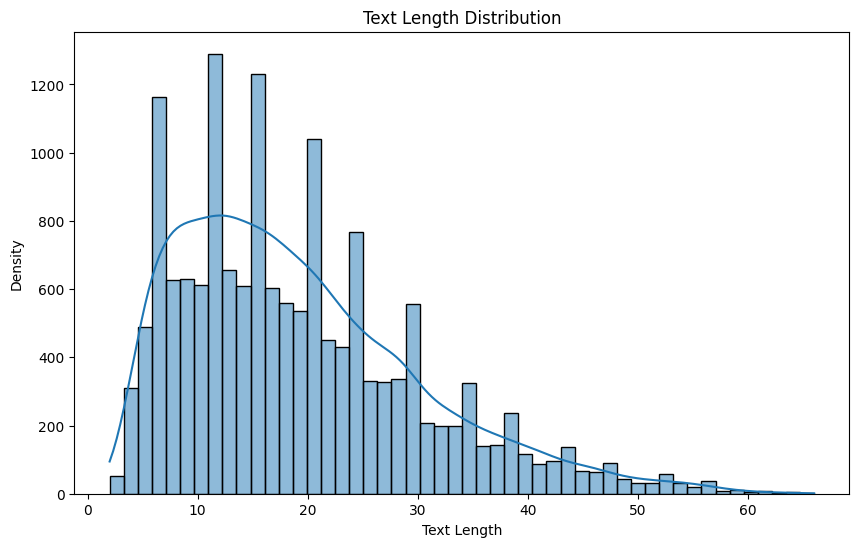

In [18]:
df_train['text_word_count'] = df_train['text'].str.split().str.len()
# plot the histogram
plt.figure(figsize=(10,6))
sns.histplot(df_train['text_word_count'], bins=50, kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Density')
plt.show()


## n-gram distribution analysis

In [12]:
# Creating individual dataframes of different emotions
sadness = df_train[df_train['label']==0]['text']
joy = df_train[df_train['label']==1]['text']
love = df_train[df_train['label']==2]['text']
anger = df_train[df_train['label']==3]['text']
fear = df_train[df_train['label']==4]['text']
surprise = df_train[df_train['label']==5]['text']

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [14]:
# calculating unigrmas and bigrams for all given emotions

sad_unigrams = get_top_n_gram(sadness.values,(1,1),7)[2:]
joy_unigrams= get_top_n_gram(joy.values,(1,1),7)[2:]
love_unigrams= get_top_n_gram(love.values,(1,1),7)[2:]
anger_unigrams= get_top_n_gram(anger.values,(1,1),7)[2:]
fear_unigrams= get_top_n_gram(fear.values,(1,1),7)[2:]
surprise_unigrams= get_top_n_gram(surprise.values,(1,1),7)[2:]

sad_bigrams = get_top_n_gram(sadness.values,(2,2),7)[2:]
joy_bigrams= get_top_n_gram(joy.values,(2,2),7)[2:]
love_bigrams= get_top_n_gram(love.values,(2,2),7)[2:]
anger_bigrams= get_top_n_gram(anger.values,(2,2),7)[2:]
fear_bigrams= get_top_n_gram(fear.values,(2,2),7)[2:]
surprise_bigrams= get_top_n_gram(surprise.values,(2,2),7)[2:]

sad_trigrams = get_top_n_gram(sadness.values,(3,3),7)[2:]
joy_trigrams= get_top_n_gram(joy.values,(3,3),7)[2:]
love_trigrams= get_top_n_gram(love.values,(3,3),7)[2:]
anger_trigrams= get_top_n_gram(anger.values,(3,3),7)[2:]
fear_trigrams= get_top_n_gram(fear.values,(3,3),7)[2:]
surprise_trigrams= get_top_n_gram(surprise.values,(3,3),7)[2:]

### Visualizing the n-grams

### Preprocessing

In [15]:
processed_data = naive_bayes_preprocessing(
    remove_stopwords=True, 
    use_bigrams=False
)
X_train, y_train = processed_data[0]['train']
X_val, y_val = processed_data[0]['validation']
X_test, y_test = processed_data[0]['test']

In [16]:
# print shapes of the data
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (16000, 14894)
X_val shape: (2000, 14894)
X_test shape: (2000, 14894)


In [17]:
# print first row of the training data
# NOTE: the data represents the non-zero indices of the sparse matrix
print(X_train[0])


  (0, 3550)	1
  (0, 4838)	1
  (0, 6309)	1
